## ISI Epilepsy Brno & Montreal Dataframes with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of "SOZ" using H2o AutoML on "11" Outcome

14/9/2022

---

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/new_isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


In [3]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,11.0,11,34,22,0.533375,0.781969,...,0.995615,0.003025,0.985229,0.997413,0.990955,0.004121,0.970733,0.994151,0,0
1,583,ra2,0,NON_SOZ,11.0,16,40,49,0.518898,0.780688,...,0.999169,0.000649,0.996365,0.999503,0.997006,0.001574,0.987965,0.997992,0,0
2,583,ra3,0,NON_SOZ,11.0,20,35,61,0.466505,0.740345,...,0.999172,0.000648,0.996397,0.999509,0.996981,0.001719,0.987949,0.997969,0,0
3,583,ra4,0,NON_SOZ,11.0,27,37,66,0.444008,0.721173,...,0.997592,0.001411,0.991613,0.998744,0.994820,0.002903,0.984822,0.997324,0,0
4,583,ra5,0,NON_SOZ,11.0,11,58,63,0.588096,0.937518,...,0.994437,0.003369,0.981503,0.996723,0.996824,0.001831,0.987556,0.997855,0,0


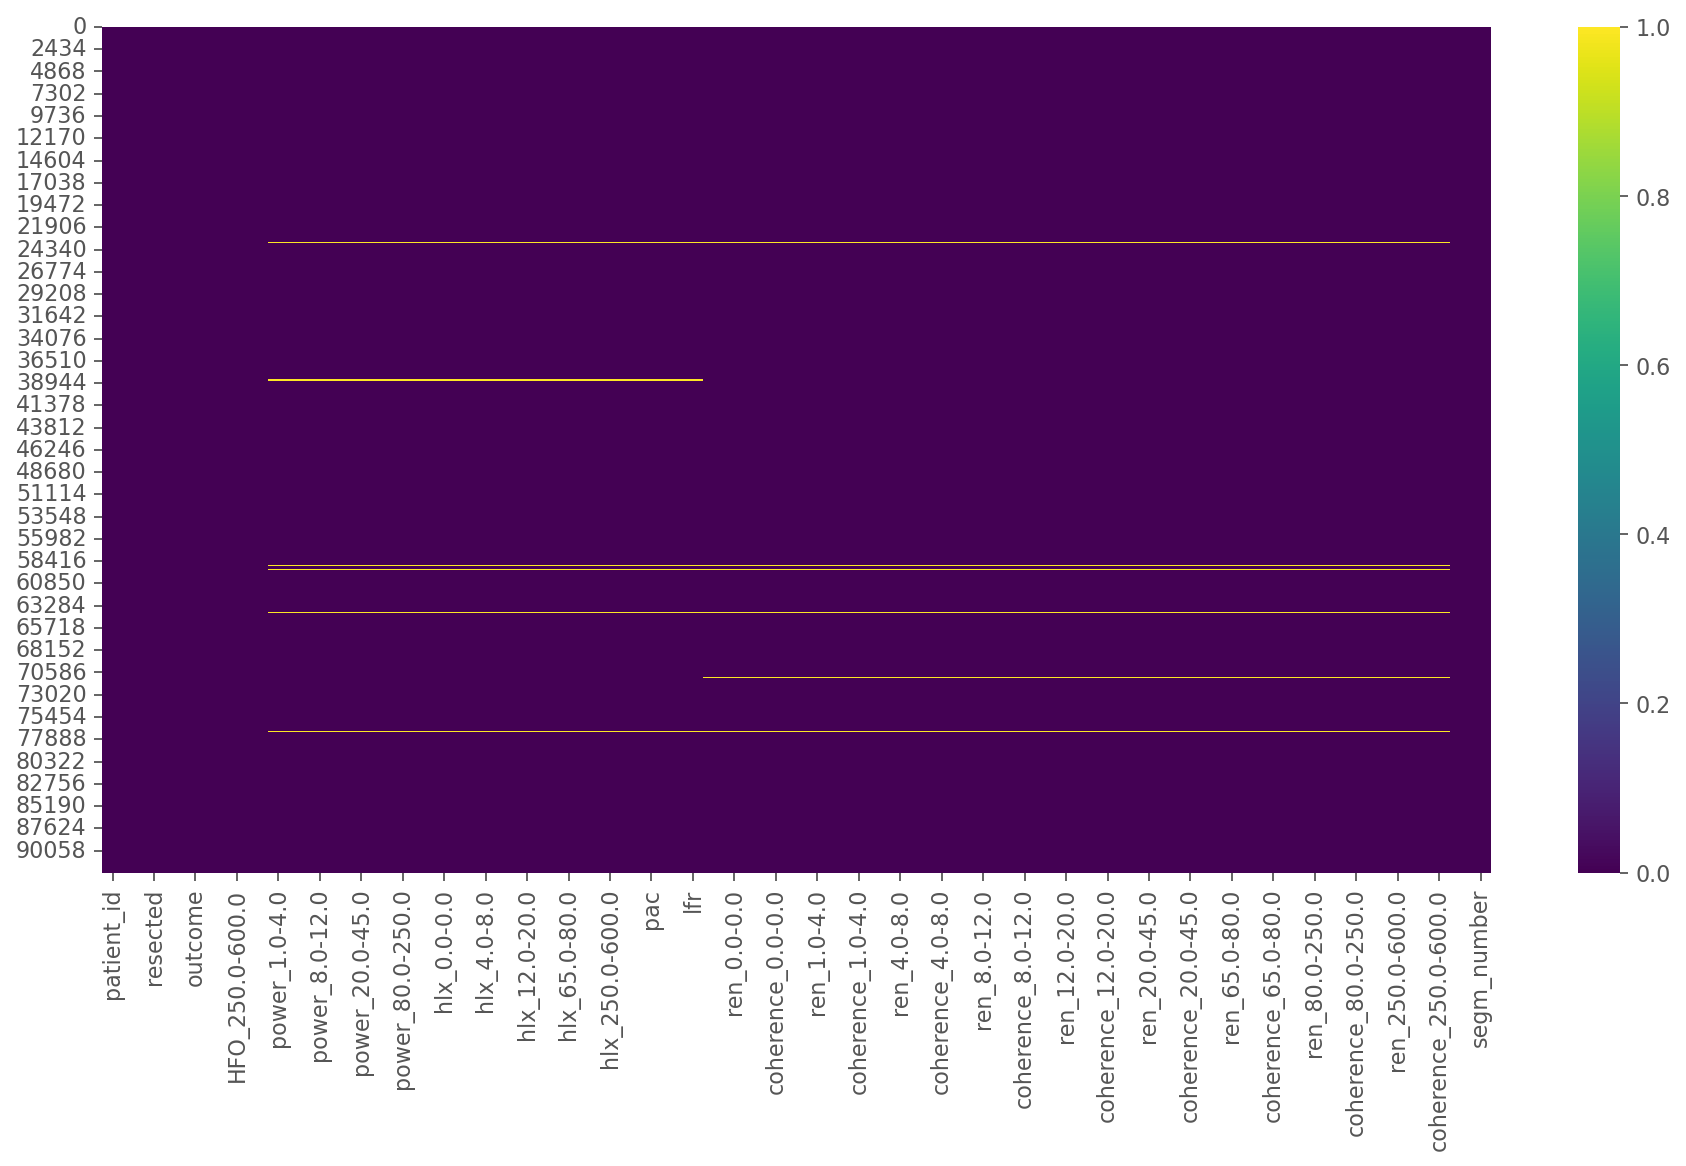

In [4]:
# Show null columns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160
sns.heatmap(epilepsy.isnull(), cmap = 'viridis', cbar = True);

#pd.options.display.min_rows = 30
#epilepsy.isnull().sum()

In [5]:
# Keep only segm_type = 4 

epilepsy_4 = epilepsy.loc[epilepsy['segm_type'] == 4]
epilepsy_4.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0


In [6]:
# Keep only outcome = 11 

epilepsy_11 = epilepsy_4.loc[epilepsy_4['outcome'] == 11]
epilepsy_11.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0


In [7]:
# Show unique patient_id

epilepsy_11.patient_id.unique()

array([ 583,  657,  953,  965, 1002, 1021, 1041,  723, 1043,  717, 1630,
         61,   63,   71,   77,   82,   89,   93], dtype=int64)

In [8]:
# Split epilepsy_11 dataframe to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy_11.groupby(epilepsy_11['patient_id'] < 100)]

In [9]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

7

In [10]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

11

In [11]:
# Country column

pd.options.mode.chained_assignment = None
epilepsy_11.loc[epilepsy_11['patient_id'] < 100 , 'country'] = 'Brno' 
epilepsy_11.loc[epilepsy_11['patient_id'] > 100 , 'country'] = 'Montreal' 
epilepsy_11.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0,Montreal
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0,Montreal
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0,Montreal
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0,Montreal
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0,Montreal


In [12]:
# Onset channels in numbers

epilepsy_11.groupby(['country', 'patient_id'])['onset_channel'].count()

country   patient_id
Brno      61            151
          63            120
          71            169
          77            168
          82             85
          89            170
          93            160
Montreal  583            87
          657            45
          717            71
          723            86
          953            88
          965            86
          1002           67
          1021           59
          1041          107
          1043           71
          1630          171
Name: onset_channel, dtype: int64

In [13]:
# Onset channels in numbers based on SOZ 

epilepsy_11.groupby(['onset_channel', 'patient_id'])['onset_channel'].count()

onset_channel  patient_id
NON_SOZ        61            142
               63            117
               71            160
               77            166
               82             74
               89            161
               93            154
               583            84
               657            37
               717            61
               723            71
               953            81
               965            80
               1002           55
               1021           41
               1041           79
               1043           62
               1630          161
SOZ            61              9
               63              3
               71              9
               77              2
               82             11
               89              9
               93              6
               583             3
               657             8
               717            10
               723            15
               95

In [14]:
# Testing datadrame

testing_df = epilepsy_11.loc[epilepsy_11['patient_id'] == 1041]
testing_df.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
35860,1041,la1,0,NON_SOZ,11.0,61,41,0,0.527295,0.190212,...,0.047633,0.902236,0.967007,0.899467,0.032641,0.821885,0.936441,4,0,Montreal
35861,1041,la10,1,NON_SOZ,11.0,4,2,15,0.522892,0.288765,...,0.027431,0.853710,0.961169,0.906775,0.023780,0.829388,0.940038,4,0,Montreal
35862,1041,la2,0,NON_SOZ,11.0,58,38,80,0.556295,0.230107,...,0.014383,0.959950,0.987514,0.966528,0.013049,0.923064,0.977450,4,0,Montreal
35863,1041,la3,1,NON_SOZ,11.0,75,11,71,0.614911,0.270569,...,0.004420,0.983385,0.996947,0.968313,0.012375,0.926040,0.978447,4,0,Montreal
35864,1041,la4,1,NON_SOZ,11.0,89,7,65,0.674321,0.340150,...,0.002980,0.986928,0.997876,0.968713,0.012769,0.927198,0.978726,4,0,Montreal


In [16]:
# Show unique patient_id in training dataframe

testing_df.patient_id.unique()

array([1041], dtype=int64)

In [17]:
# Drop columns no. 0, 1, 2, 65, 66, 67

testing_df_drop = testing_df.drop(testing_df.columns[[0, 1, 2, 4, 65, 66, 67 ]], axis=1)
testing_df_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
35860,NON_SOZ,61,41,0,0.527295,0.190212,0.194513,0.181204,0.042685,0.001365,...,0.890241,0.962474,0.936287,0.047633,0.902236,0.967007,0.899467,0.032641,0.821885,0.936441
35861,NON_SOZ,4,2,15,0.522892,0.288765,0.290193,0.262431,0.056474,0.001695,...,0.849197,0.963806,0.924675,0.027431,0.853710,0.961169,0.906775,0.023780,0.829388,0.940038
35862,NON_SOZ,58,38,80,0.556295,0.230107,0.266866,0.252279,0.056271,0.002099,...,0.948792,0.982798,0.976427,0.014383,0.959950,0.987514,0.966528,0.013049,0.923064,0.977450
35863,NON_SOZ,75,11,71,0.614911,0.270569,0.340979,0.322704,0.070839,0.002208,...,0.985730,0.997313,0.994595,0.004420,0.983385,0.996947,0.968313,0.012375,0.926040,0.978447
35864,NON_SOZ,89,7,65,0.674321,0.340150,0.461153,0.438884,0.094838,0.002899,...,0.993850,0.999023,0.996223,0.002980,0.986928,0.997876,0.968713,0.012769,0.927198,0.978726


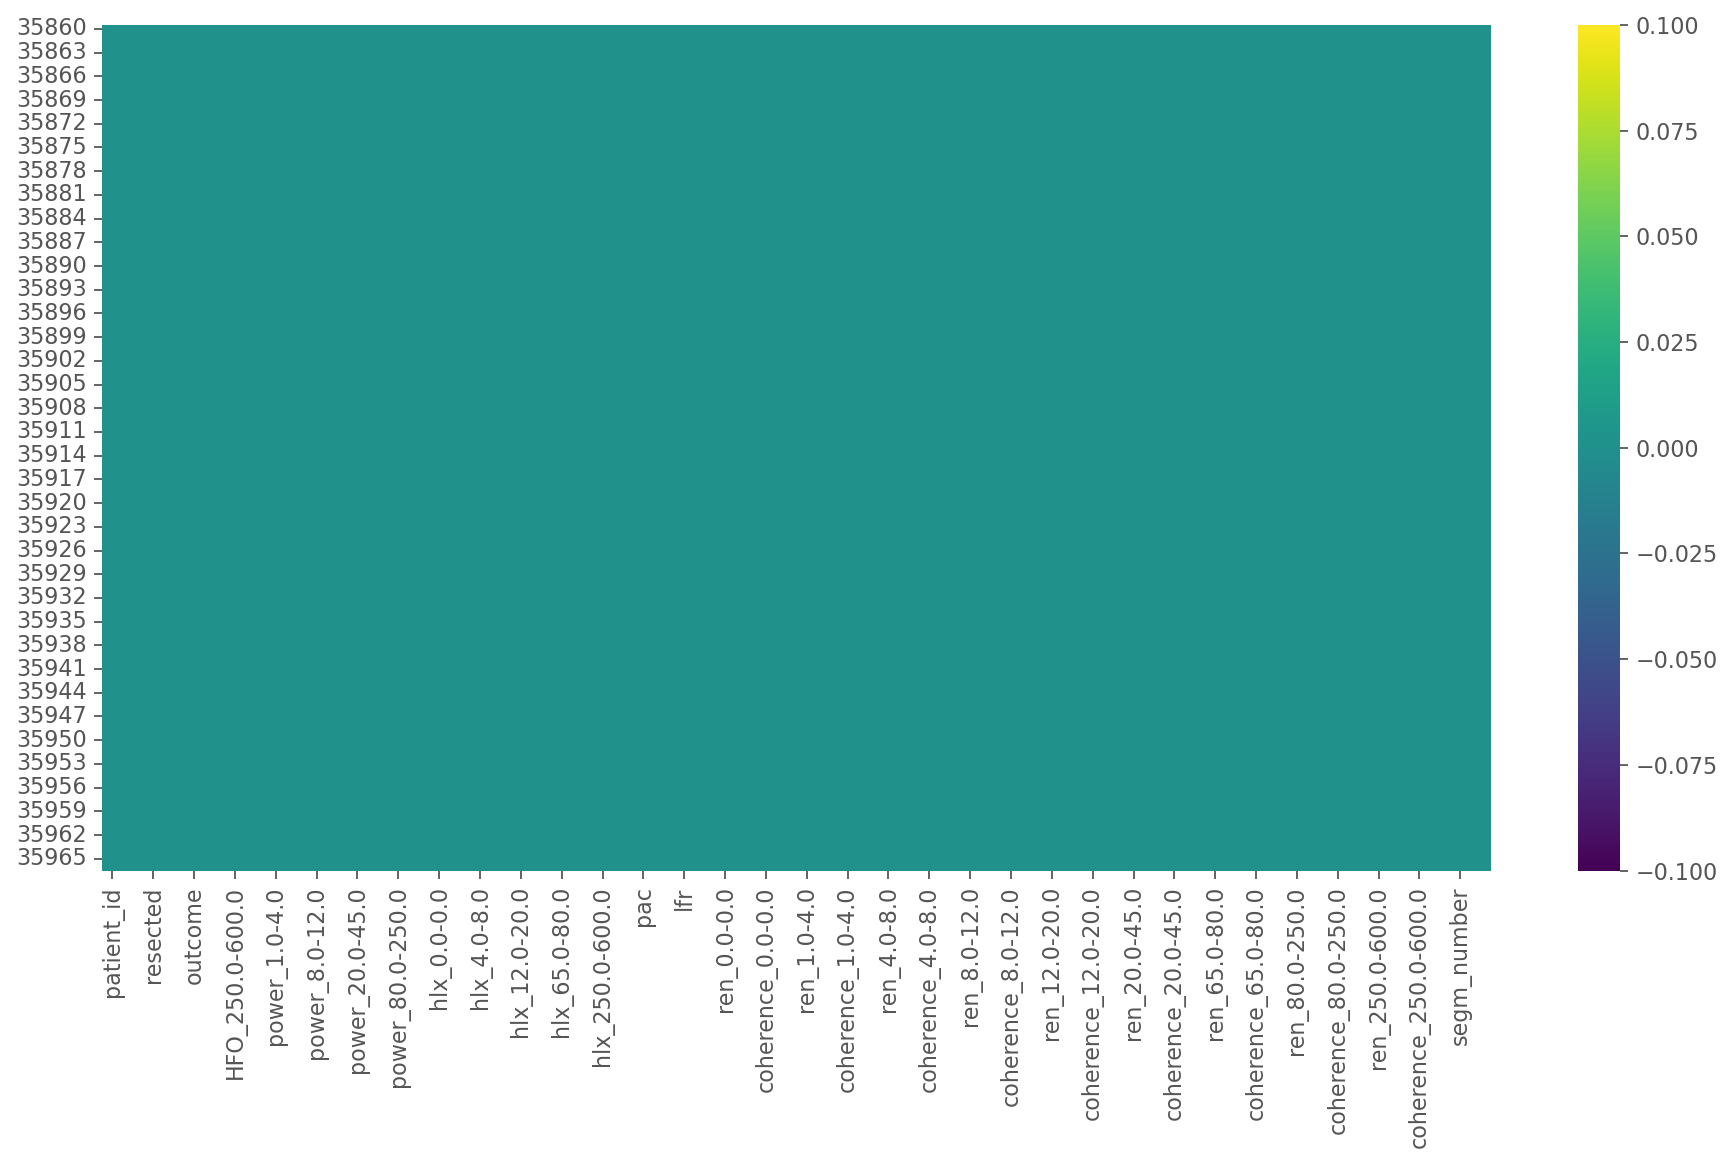

In [19]:
# Show null columns in testing dataframe

sns.heatmap(testing_df.isnull(), cmap = 'viridis', cbar = True);

In [20]:
# Training dataframe

delete_row = epilepsy_11[epilepsy_11["patient_id"] == 1041].index
training_df = epilepsy_11.drop(delete_row)
training_df.head()

,patient_id,channel_name,resected,onset_channel,outcome,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,...,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
34674,583,ra1,0,NON_SOZ,11.0,19,56,50,0.526201,0.474988,...,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141,4,0,Montreal
34675,583,ra2,0,NON_SOZ,11.0,35,62,86,0.560877,0.560381,...,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048,4,0,Montreal
34676,583,ra3,0,NON_SOZ,11.0,36,66,101,0.558763,0.576171,...,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657,4,0,Montreal
34677,583,ra4,0,NON_SOZ,11.0,47,66,102,0.554024,0.565439,...,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107,4,0,Montreal
34678,583,ra5,0,NON_SOZ,11.0,32,75,96,0.649021,0.658895,...,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945,4,0,Montreal


In [21]:
# Show unique patient_id in training dataframe

training_df.patient_id.unique()

array([ 583,  657,  953,  965, 1002, 1021,  723, 1043,  717, 1630,   61,
         63,   71,   77,   82,   89,   93], dtype=int64)

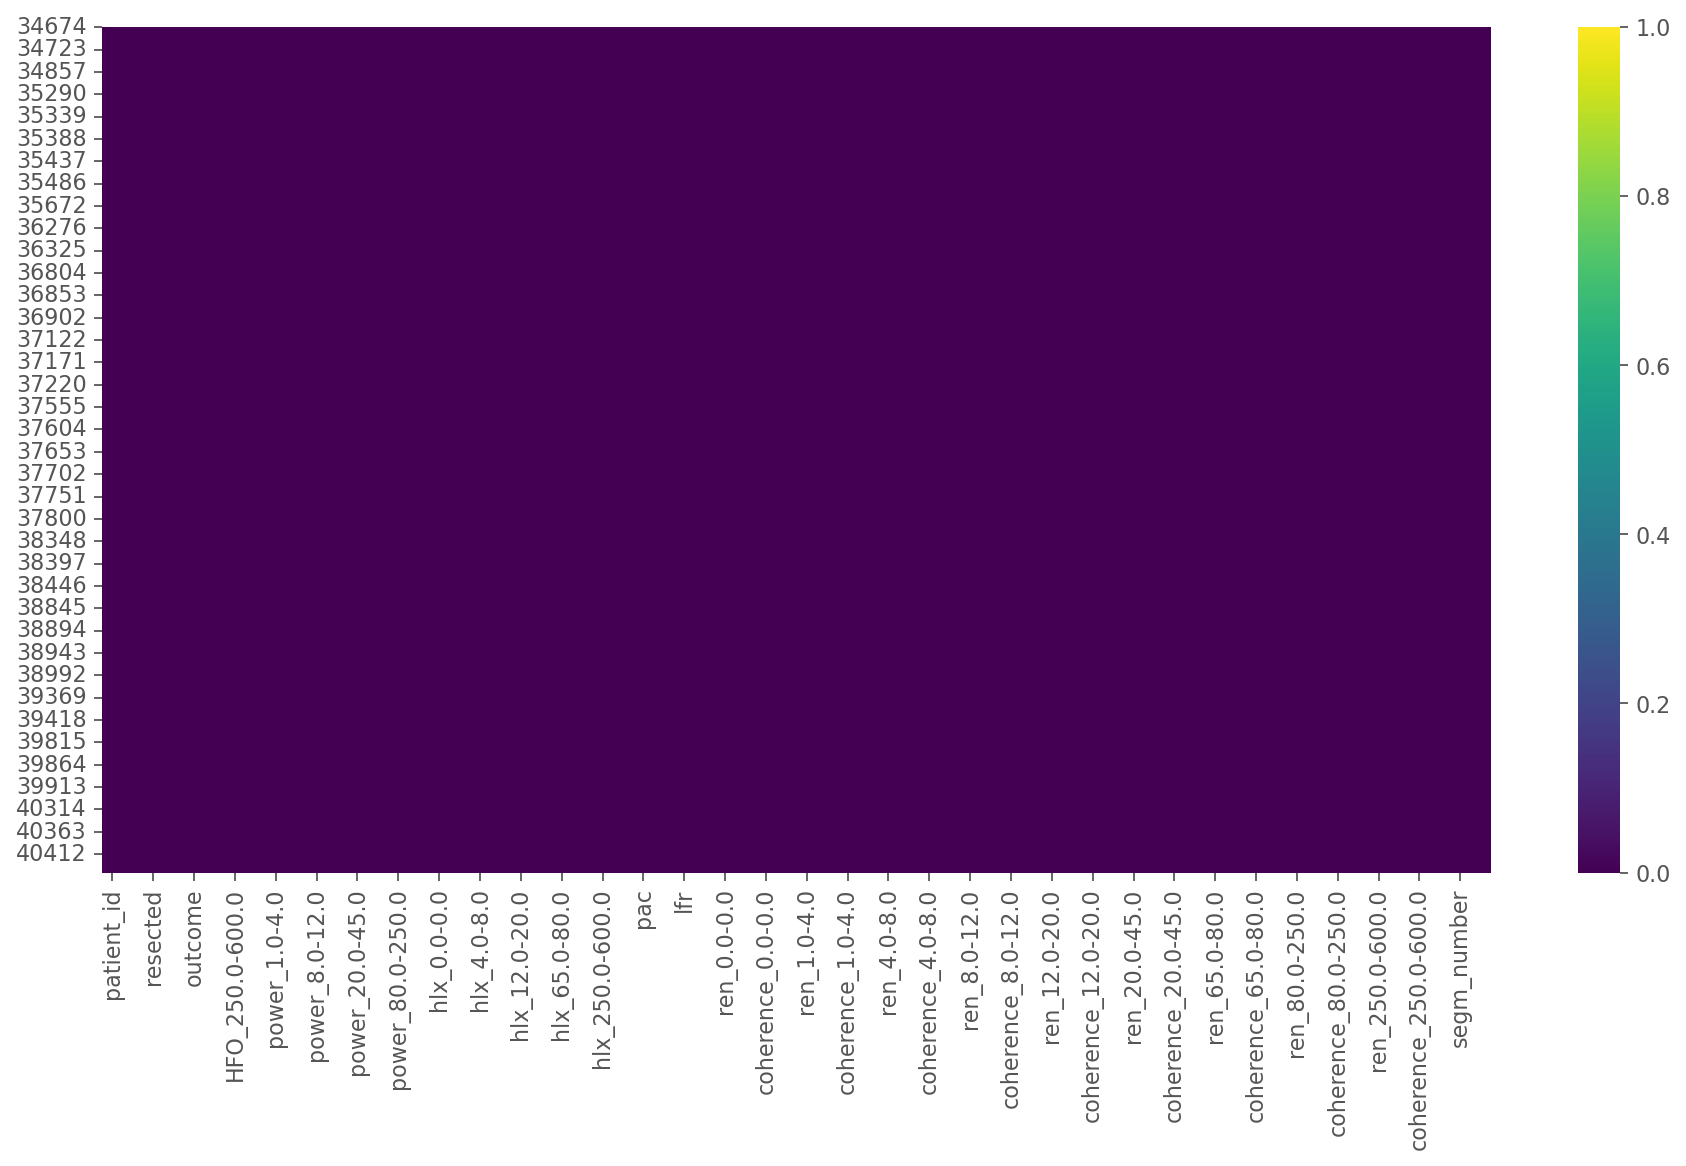

In [25]:
# Show null columns in training dataframe

sns.heatmap(training_df.isnull(), cmap = 'viridis', cbar = True);

In [23]:
# Drop columns no. 0, 1, 2, 65, 66, 67

training_df_drop = training_df.drop(training_df.columns[[0, 1, 2, 4, 65, 66, 67 ]], axis=1)
training_df_drop.head()

,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,...,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
34674,NON_SOZ,19,56,50,0.526201,0.474988,0.309262,0.364289,0.237353,0.007892,...,0.971446,0.994984,0.986394,0.008171,0.962278,0.992315,0.951701,0.015386,0.894617,0.968141
34675,NON_SOZ,35,62,86,0.560877,0.560381,0.374400,0.447637,0.290251,0.009658,...,0.997157,0.999653,0.997199,0.001929,0.989986,0.998410,0.982513,0.007849,0.952962,0.988048
34676,NON_SOZ,36,66,101,0.558763,0.576171,0.389969,0.467600,0.301467,0.009999,...,0.997194,0.999641,0.997173,0.002038,0.989737,0.998386,0.982065,0.007308,0.951814,0.987657
34677,NON_SOZ,47,66,102,0.554024,0.565439,0.381853,0.453898,0.290972,0.009569,...,0.988372,0.998245,0.992253,0.005044,0.975965,0.995656,0.975849,0.009962,0.941062,0.984107
34678,NON_SOZ,32,75,96,0.649021,0.658895,0.427324,0.507019,0.320779,0.010582,...,0.955550,0.991911,0.978247,0.009224,0.944790,0.987954,0.980963,0.007094,0.949647,0.986945


## CLASSIFICATION PROBLEM
Predicting "Onset_channel" on "Outcome" 11, split 17 patients (trainig) vs 1 patient (testing)

In [24]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.333-b02, mixed mode)
  Starting server from C:\Users\marek\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\marek\AppData\Local\Temp\tmpps05qyts
  JVM stdout: C:\Users\marek\AppData\Local\Temp\tmpps05qyts\h2o_Rodina_started_from_python.out
  JVM stderr: C:\Users\marek\AppData\Local\Temp\tmpps05qyts\h2o_Rodina_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,3 months and 1 day
H2O_cluster_name:,H2O_from_python_Rodina_aqneg4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.531 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [49]:
# Parse dataframes to H2o

train = h2o.H2OFrame(training_df_drop)
test = h2o.H2OFrame(testing_df_drop)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [50]:
# Train dataframe summary describe

train.describe()

Rows:1854
Cols:61




,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
type,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.0,0.0,0.0,1.1826376628302974e-08,1.8638407384680984e-09,4.766788749889558e-10,6.22031616719175e-10,2.1963038986838512e-10,3.4960783522950397e-12,1.058213811237117e-11,1.59087007998756e-11,3.858667532602946,1.122020035982132,1.0508635320266089,1.0155952588717143,1.0245686505238216,1.066467293103536,1.0053633546829224,1.007588633298874,1.036214944124222,1.3500831046437054e-07,-0.0171302647654522,-0.0495011295057419,0.0015798821801945,-0.5421305097146736,0.0001677830344048,0.2385681683663278,0.7571351392567158,-0.6001673864743983,1.2975392178683858e-05,0.4559963138649861,0.8199521092077097,-0.4964481848354141,8.709023608541126e-06,0.392923627247413,0.8083997543652852,-0.4686981505885099,8.48915192155649e-06,0.3944367583064983,0.8272889363765716,-0.5212810827450206,9.50278950313077e-06,0.267083690110594,0.794589437643687,-0.5645505384852488,2.587170952172831e-05,0.178333163637047,0.7805999304850896,-0.299986646969337,0.0001282283776617,0.2004972866674264,0.78922756254673,-0.1576321234771361,0.0001267271624237,0.0823380997315204,0.5723959324757258,-0.124110395940952,0.0003117441844187,0.0761130808511128,0.5353593720992407
mean,,18.84196332254584,20.095469255663414,22.480582524271853,0.23606380960744813,0.22802294439718662,0.2164340045994166,0.48485699096963586,0.14162499852489036,0.0052923782336663045,0.0371929783927452,0.0058048041360059385,22.86300418900722,1.3029931594865947,1.0696896600782184,1.0235230825383324,1.0342805686664855,1.096935154487444,1.0065311942303918,1.194132054910222,1.091611212346889,0.1983436240768247,0.0006302752195459677,0.00048156889777017166,0.16342967826498034,0.7373475549332944,0.18742366589828127,0.8755388512999116,0.9577734374981497,0.7945736987820752,0.1940755090935731,0.8303136039336199,0.9512370536192353,0.8321631740548247,0.08465889031604122,0.8370667737311616,0.9554218584207954,0.8425321840658495,0.053212407574353915,0.8440008589989224,0.9578395008488656,0.8475654964041592,0.04400002200883287,0.8326917811191468,0.9550864147932483,0.8265805822066461,0.05134902707199973,0.7886111763549425,0.9428327112428708,0.7561010145351141,0.033934269118272804,0.7231072911818114,0.9250405058850164,0.7131114553221289,0.06911623898515878,0.6631675959328375,0.9051708333665232,0.6050288937508682,0.0359596140314936,0.5624942659973197,0.8708106900967918
maxs,,125.0,282.0,724.0,3.3898550228527218,4.3489998570881,4.894479046433155,18.690419429107656,4.15884444848319,0.0741138181039369,1.009781330122556,0.1483456896931834,106.99863774617512,1.420734569231669,1.084064398407936,1.0292266770203908,1.043600591222445,1.1172203421592712,1.0091928533713024,1.300721081495285,1.1669275335470837,0.6463271533

In [51]:
# Test dataframe summary describe

test.describe()

Rows:107
Cols:61




,onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0
type,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real
mins,,0.0,0.0,0.0,0.3642559630888586,0.0625865772772211,0.0225953940690036,0.0214706578544652,0.0049569883102734,0.0003572000705432,0.0002579450179025,6.730804667734005e-06,12.065984590848286,1.206187949379285,1.063969711661339,1.0223124931255976,1.0323516126473744,1.094742313226064,1.0058363886674244,1.1847119585673014,1.0765187843640645,0.3817813618536348,-0.0036975225313519,-0.0228505562728376,0.0150320927102843,-0.5919939587855091,0.0210325304094779,0.3380921505826215,0.8054088815053304,-0.3583188535630082,0.0069421183047112,0.5035571828422447,0.8547070387999217,0.2715175798819594,0.0016113869421193,0.4862846725434064,0.8564991692701975,0.637957359427237,0.0008445178385197,0.6966252393089235,0.9158423946301142,0.6760868103305498,0.00051606550768,0.7260958728442589,0.9162802815437316,0.7386180746058623,0.0003313656253734,0.6599345779418946,0.9019598042964936,0.261035988246634,0.0004096215911764,0.3149520935801168,0.8144946211576461,0.5359381686647733,0.0017433613418446,0.4738610776265462,0.8276553231477738,0.8530635253588359,0.0103589356004768,0.7726770186424256,0.9116800224781036
mean,,21.794392523364483,6.121495327102806,19.0841121495327,0.7706301277128013,0.603167725448942,0.8062832000984982,0.790659443403187,0.17434626580484636,0.005256846947193827,0.007936963650234415,0.0007037736522462187,25.3499317629018,1.2618250857223974,1.068081989098932,1.023682277887781,1.0351368242205117,1.0970310517894895,1.0062870872094993,1.2006639981121292,1.0773917710966792,0.4377929879757472,0.0007208122112347743,-0.0007289589743463041,0.06896744070876051,0.8106849118377887,0.15478302763195634,0.795686167819263,0.9388614969117988,0.9045206594142207,0.1242326478146175,0.9066677624591106,0.9748304430708705,0.9480374748132675,0.0409243736275387,0.9355111283395509,0.9830495735761533,0.9728544746160654,0.01914282635846782,0.9607416305561606,0.9903492192390181,0.9801971974233135,0.013064312186873983,0.9669116560757348,0.9923306560869154,0.9787572849823691,0.01282433706366173,0.9612379587021572,0.990914055190725,0.9610138428961745,0.010510436916082768,0.943430571933901,0.9855137555157282,0.9706556136403348,0.01470023620690883,0.9475106989845308,0.9860151783922382,0.9516077310496773,0.017018539083386436,0.9001112648538337,0.9681071181609252
maxs,,89.0,96.0,120.0,2.146471710748066,2.1613808796831084,3.1239915139879626,3.1156291655458244,0.7083612840728297,0.0210418890239008,0.0326318276032382,0.0029413970226985,39.5948575258255,1.305958360632261,1.077225273648898,1.0259819879134495,1.038675112724304,1.1081163056691488,1.0064660507440566,1.2042394999663035,1.0807576417922973,0.5012565596015365,0.0061236231234889,0.0310407226139472,0.

In [52]:
# Define X and y

X = train.columns
y = 'onset_channel'
X.remove(y)

In [53]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'onset_channel'

In [54]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [55]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |
12:12:32.838: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Wall time: 9min 54s
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_4_AutoML_2_20220828_121232

No model summary for this model

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.002897132520408652
RMSE: 0.05382501760713741
LogLoss: 0.025262660466699696
Null degrees of freedom: 1853
Residual degrees of freedom: 1849
Null deviance: 1027.216230501327
Residual deviance: 93.67394501052244
AIC: 103.67394501052244
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.7831334769120865: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1707.0,0.0,0.0,(0.0/1707.0)
1,SOZ,0.0,147.0,0.0,(0.0/147.0)
2,Total,1707.0,147.0,0.0,(0.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.783133,1.000000,57.0
1,max f2,0.783133,1.000000,57.0
2,max f0point5,0.783133,1.000000,57.0
3,max accuracy,0.783133,1.000000,57.0
4,max precision,0.999208,1.000000,0.0
5,max recall,0.783133,1.000000,57.0
6,max specificity,0.999208,1.000000,0.0
7,max absolute_mcc,0.783133,1.000000,57.0
8,max min_per_class_accuracy,0.783133,1.000000,57.0
9,max mean_per_class_accuracy,0.783133,1.000000,57.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  9.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.998860,12.612245,12.612245,1.000000,0.999153,1.000000,0.999153,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.997627,12.612245,12.612245,1.000000,0.998293,1.000000,0.998723,0.129252,0.258503,1161.224490,1161.224490,0.258503
2,3,0.030205,0.996302,12.612245,12.612245,1.000000,0.996999,1.000000,0.998169,0.122449,0.380952,1161.224490,1161.224490,0.380952
3,4,0.040453,0.994092,12.612245,12.612245,1.000000,0.995416,1.000000,0.997471,0.129252,0.510204,1161.224490,1161.224490,0.510204
4,5,0.050162,0.992556,12.612245,12.612245,1.000000,0.993173,1.000000,0.996639,0.122449,0.632653,1161.224490,1161.224490,0.632653
5,6,0.100324,0.159323,7.323239,9.967742,0.580645,0.653621,0.790323,0.825130,0.367347,1.000000,632.323897,896.774194,0.977153
6,7,0.149946,0.079850,0.000000,6.669065,0.000000,0.112250,0.528777,0.589213,0.000000,1.000000,-100.000000,566.906475,0.923257
7,8,0.200108,0.052012,0.000000,4.997305,0.000000,0.063667,0.396226,0.457472,0.000000,1.000000,-100.000000,399.730458,0.868776
8,9,0.299892,0.026364,0.000000,3.334532,0.000000,0.036844,0.264388,0.317515,0.000000,1.000000,-100.000000,233.453237,0.760398
9,10,0.400216,0.010544,0.000000,2.498652,0.000000,0.017476,0.198113,0.242303,0.000000,1.000000,-100.000000,149.865229,0.651435




ModelMetricsBinomialGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.03779944415906864
RMSE: 0.1944207914783515
LogLoss: 0.13527826718017216
Null degrees of freedom: 1853
Residual degrees of freedom: 1849
Null deviance: 1027.3343655235726
Residual deviance: 501.6118147040782
AIC: 511.6118147040782
AUC: 0.9431094054493502
AUCPR: 0.7285067040873375
Gini: 0.8862188108987004

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20846572008638248: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,1635.0,72.0,0.0422,(72.0/1707.0)
1,SOZ,38.0,109.0,0.2585,(38.0/147.0)
2,Total,1673.0,181.0,0.0593,(110.0/1854.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.208466,0.664634,151.0
1,max f2,0.135428,0.711679,193.0
2,max f0point5,0.733362,0.730858,56.0
3,max accuracy,0.505108,0.951996,79.0
4,max precision,0.999647,1.000000,0.0
5,max recall,0.000572,1.000000,398.0
6,max specificity,0.999647,1.000000,0.0
7,max absolute_mcc,0.208466,0.636594,151.0
8,max min_per_class_accuracy,0.071455,0.870748,242.0
9,max mean_per_class_accuracy,0.071455,0.873277,242.0



Gains/Lift Table: Avg response rate:  7.93 %, avg score:  7.95 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010248,0.956415,12.612245,12.612245,1.000000,0.976030,1.000000,0.976030,0.129252,0.129252,1161.224490,1161.224490,0.129252
1,2,0.020496,0.898892,11.284640,11.948443,0.894737,0.930865,0.947368,0.953448,0.115646,0.244898,1028.464017,1094.844253,0.243726
2,3,0.030205,0.807206,11.210884,11.711370,0.888889,0.858843,0.928571,0.923039,0.108844,0.353741,1021.088435,1071.137026,0.351398
3,4,0.040453,0.704880,7.965628,10.762449,0.631579,0.762432,0.853333,0.882352,0.081633,0.435374,696.562836,976.244898,0.428930
4,5,0.050162,0.506751,7.707483,10.171165,0.611111,0.612399,0.806452,0.830103,0.074830,0.510204,670.748299,917.116524,0.499659
5,6,0.100324,0.199673,4.746544,7.458855,0.376344,0.315451,0.591398,0.572777,0.238095,0.748299,374.654378,645.885451,0.703777
6,7,0.149946,0.101641,1.507986,5.489502,0.119565,0.144007,0.435252,0.430882,0.074830,0.823129,50.798580,448.950228,0.731155
7,8,0.200108,0.063361,0.949309,4.351394,0.075269,0.078811,0.345013,0.342627,0.047619,0.870748,-5.069124,335.139447,0.728393
8,9,0.299892,0.035263,0.954440,3.221113,0.075676,0.048114,0.255396,0.244632,0.095238,0.965986,-4.555985,222.111291,0.723456
9,10,0.400216,0.021060,0.067808,2.430662,0.005376,0.027707,0.192722,0.190255,0.006803,0.972789,-93.219223,143.066175,0.621881




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.947672,0.018402,0.920844,0.949009,0.968668,0.940379,0.959460
1,auc,0.943785,0.015223,0.929485,0.958022,0.961284,0.940616,0.929518
2,err,0.052328,0.018402,0.079156,0.050992,0.031332,0.059621,0.040541
3,err_count,19.400000,6.985700,30.000000,18.000000,12.000000,22.000000,15.000000
4,f0point5,0.687596,0.111404,0.555556,0.670732,0.809859,0.609756,0.792079
5,f1,0.688836,0.068324,0.615385,0.709677,0.793103,0.645161,0.680851
6,f2,0.700411,0.070226,0.689655,0.753425,0.777027,0.684932,0.597015
7,lift_top_group,12.630950,0.488584,11.843750,12.607142,12.766666,13.178572,12.758620
8,logloss,0.135148,0.018550,0.164084,0.121743,0.116334,0.136778,0.136799
9,max_per_class_error,0.286322,0.094268,0.250000,0.214286,0.233333,0.285714,0.448276



See the whole table with table.as_data_frame()


In [56]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_4_AutoML_2_20220828_121232,0.943109,0.135278,0.728507,0.150341,0.194421,0.0377994
StackedEnsemble_BestOfFamily_6_AutoML_2_20220828_121232,0.942884,0.134916,0.729382,0.150341,0.194178,0.0377052
StackedEnsemble_AllModels_4_AutoML_2_20220828_121232,0.942727,0.135746,0.724386,0.214041,0.194819,0.0379546
StackedEnsemble_AllModels_6_AutoML_2_20220828_121232,0.942583,0.134465,0.729046,0.218793,0.193485,0.0374366
StackedEnsemble_AllModels_1_AutoML_2_20220828_121232,0.941982,0.139524,0.711231,0.199963,0.198108,0.0392466
StackedEnsemble_AllModels_3_AutoML_2_20220828_121232,0.941818,0.136456,0.72519,0.17433,0.195171,0.0380917
StackedEnsemble_BestOfFamily_2_AutoML_2_20220828_121232,0.941633,0.14028,0.706827,0.214041,0.198433,0.0393757
StackedEnsemble_Best1000_1_AutoML_2_20220828_121232,0.941099,0.136692,0.72066,0.183363,0.195595,0.0382574
StackedEnsemble_AllModels_2_AutoML_2_20220828_121232,0.939885,0.141169,0.702784,0.206473,0.199168,0.0396677
StackedEnsemble_BestOfFamily_3_AutoML_2_20220828_121232,0.937937,0.141525,0.706402,0.214334,0.198654,0.0394635


In [58]:
# Explain a single H2O model (e.g. leader model from AutoML)

#exm = aml.leader.explain(test)

In [67]:
# One of the leaders model 

model = h2o.get_model('StackedEnsemble_BestOfFamily_4_AutoML_2_20220828_121232')

In [68]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.2200495858727363
RMSE: 0.4690944317221601
LogLoss: 0.7097507450555033
Null degrees of freedom: 106
Residual degrees of freedom: 102
Null deviance: 154.9934846097905
Residual deviance: 151.88665944187767
AIC: 161.88665944187767
AUC: 0.6785714285714285
AUCPR: 0.342697030637265
Gini: 0.357142857142857

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.041583601196637204: 


,,NON_SOZ,SOZ,Error,Rate
0,NON_SOZ,37.0,42.0,0.5316,(42.0/79.0)
1,SOZ,3.0,25.0,0.1071,(3.0/28.0)
2,Total,40.0,67.0,0.4206,(45.0/107.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.041584,0.526316,66.0
1,max f2,0.041584,0.698324,66.0
2,max f0point5,0.162266,0.441176,26.0
3,max accuracy,0.764328,0.728972,0.0
4,max precision,0.162266,0.444444,26.0
5,max recall,0.005140,1.000000,91.0
6,max specificity,0.764328,0.987342,0.0
7,max absolute_mcc,0.041584,0.328161,66.0
8,max min_per_class_accuracy,0.085111,0.642857,45.0
9,max mean_per_class_accuracy,0.041584,0.680606,66.0



Gains/Lift Table: Avg response rate: 26.17 %, avg score: 12.45 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018692,0.691403,0.000000,0.000000,0.000000,0.733683,0.000000,0.733683,0.000000,0.000000,-100.000000,-100.000000,-0.025316
1,2,0.028037,0.506798,0.000000,0.000000,0.000000,0.509128,0.000000,0.658831,0.000000,0.000000,-100.000000,-100.000000,-0.037975
2,3,0.037383,0.480767,0.000000,0.000000,0.000000,0.489711,0.000000,0.616551,0.000000,0.000000,-100.000000,-100.000000,-0.050633
3,4,0.046729,0.436736,0.000000,0.000000,0.000000,0.440023,0.000000,0.581246,0.000000,0.000000,-100.000000,-100.000000,-0.063291
4,5,0.056075,0.423204,3.821429,0.636905,1.000000,0.426324,0.166667,0.555425,0.035714,0.035714,282.142857,-36.309524,-0.027577
5,6,0.102804,0.325720,0.764286,0.694805,0.200000,0.391679,0.181818,0.480995,0.035714,0.071429,-23.571429,-30.519481,-0.042495
6,7,0.149533,0.272044,2.292857,1.194196,0.600000,0.286577,0.312500,0.420239,0.107143,0.178571,129.285714,19.419643,0.039331
7,8,0.205607,0.223019,1.910714,1.389610,0.500000,0.252710,0.363636,0.374549,0.107143,0.285714,91.071429,38.961039,0.108499
8,9,0.299065,0.143694,1.910714,1.552455,0.500000,0.164919,0.406250,0.309040,0.178571,0.464286,91.071429,55.245536,0.223779
9,10,0.401869,0.088151,1.042208,1.421927,0.272727,0.121903,0.372093,0.261167,0.107143,0.571429,4.220779,42.192691,0.229656


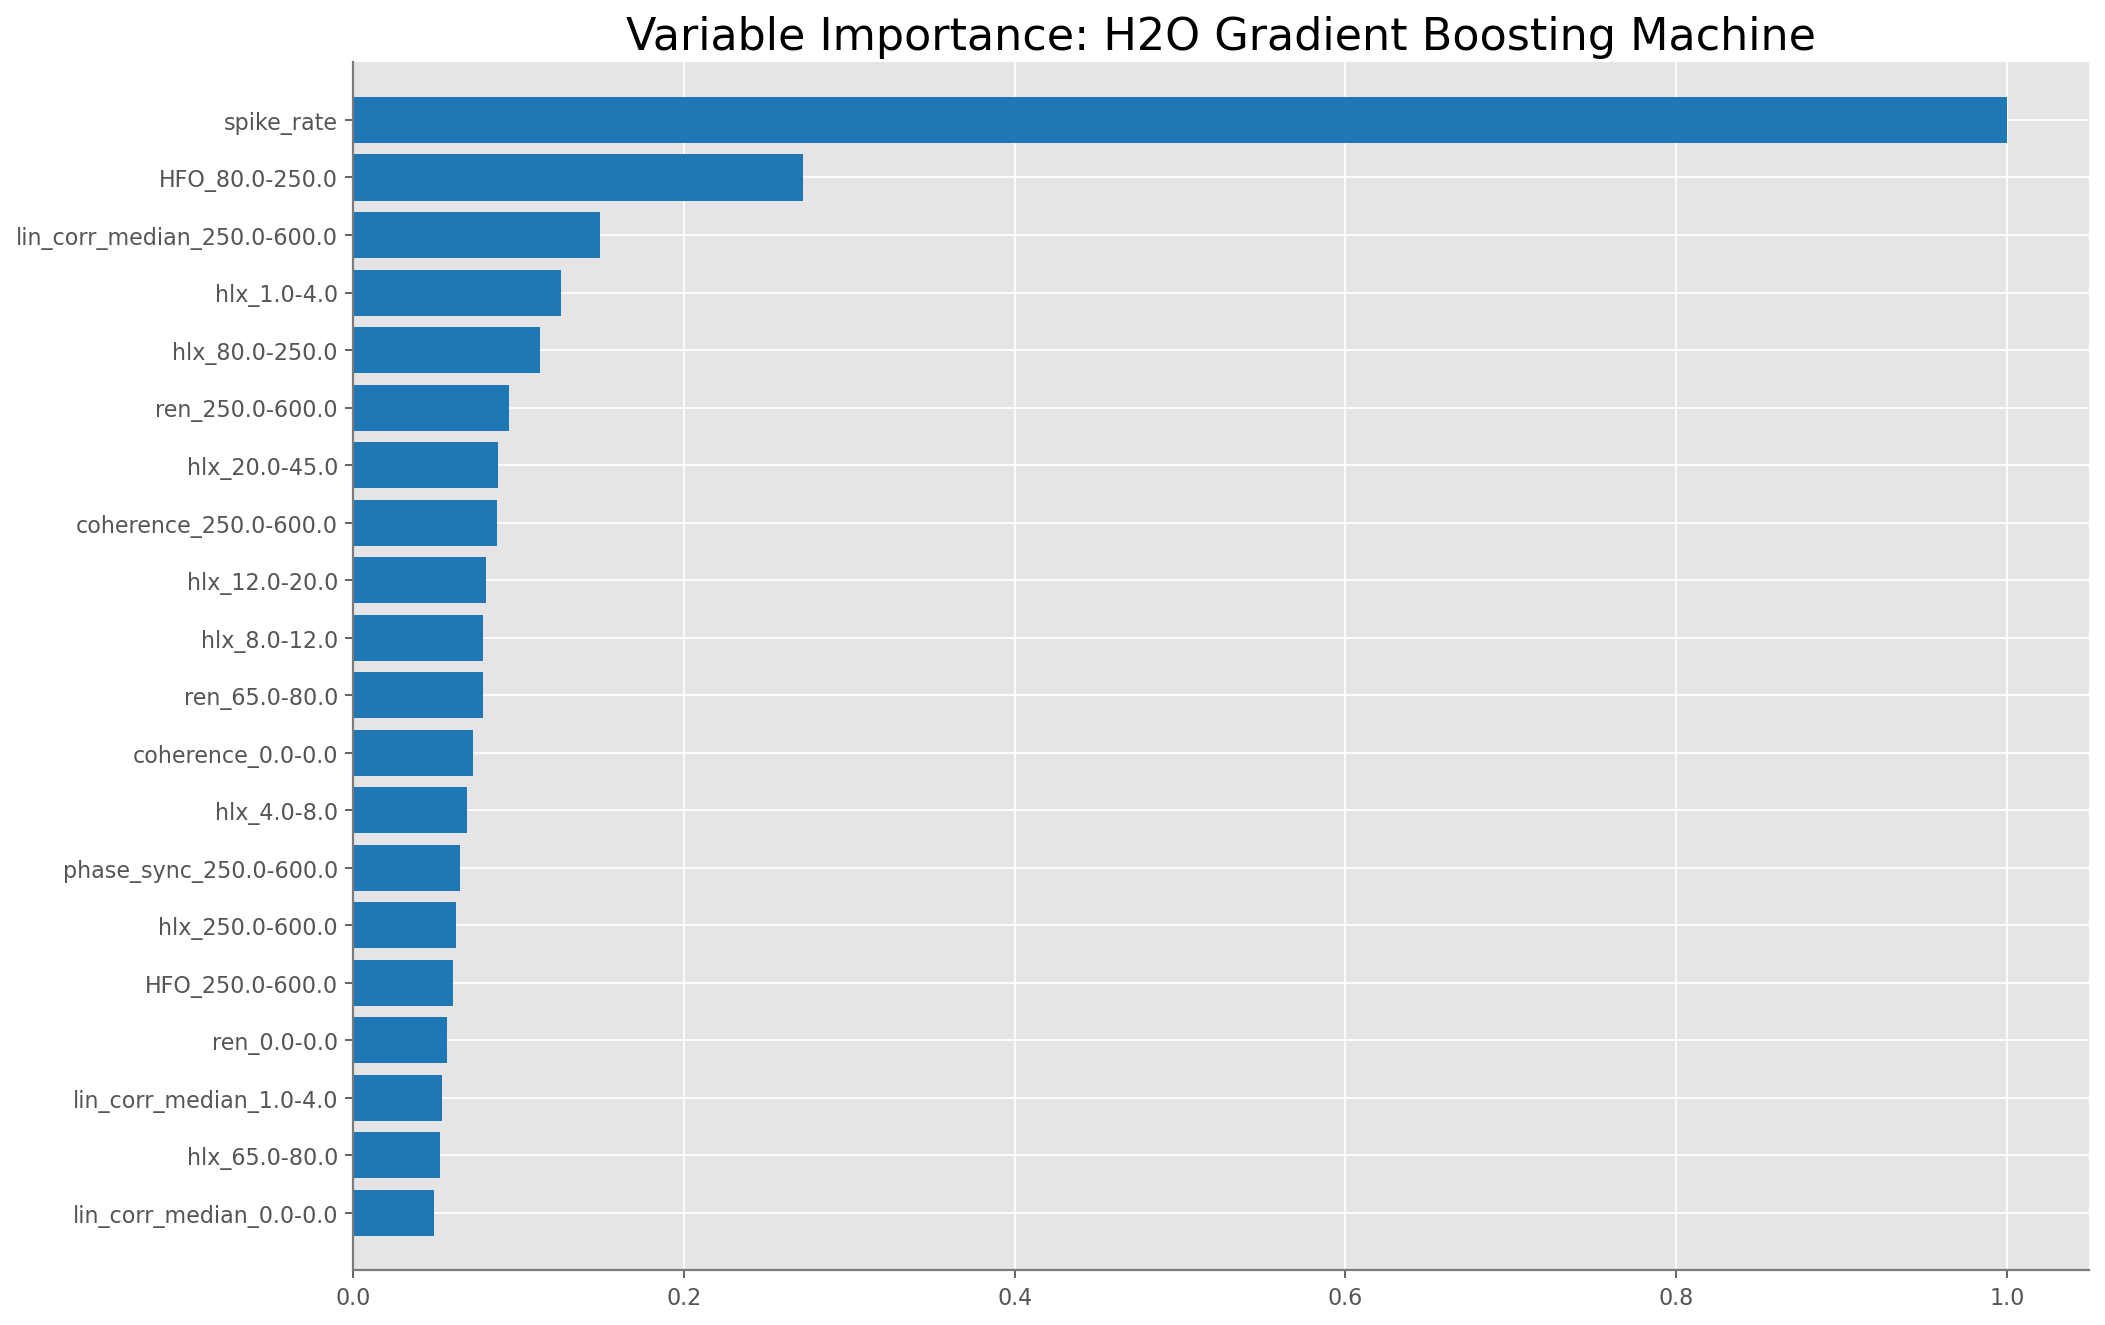

<Figure size 2240x1120 with 0 Axes>

In [61]:
# Show variable importance

model.varimp_plot(num_of_features=20)

In [62]:
# Show variable importance

model.varimp(use_pandas=True)

,variable,relative_importance,scaled_importance,percentage
0,spike_rate,1114.591675,1.000000,0.295906
1,HFO_80.0-250.0,303.104034,0.271942,0.080469
2,lin_corr_median_250.0-600.0,166.422089,0.149312,0.044182
3,hlx_1.0-4.0,139.812134,0.125438,0.037118
4,hlx_80.0-250.0,125.651978,0.112734,0.033359
5,ren_250.0-600.0,105.039894,0.094241,0.027886
6,hlx_20.0-45.0,97.624573,0.087588,0.025918
7,coherence_250.0-600.0,97.014107,0.087040,0.025756
8,hlx_12.0-20.0,89.338211,0.080153,0.023718
9,hlx_8.0-12.0,87.587029,0.078582,0.023253


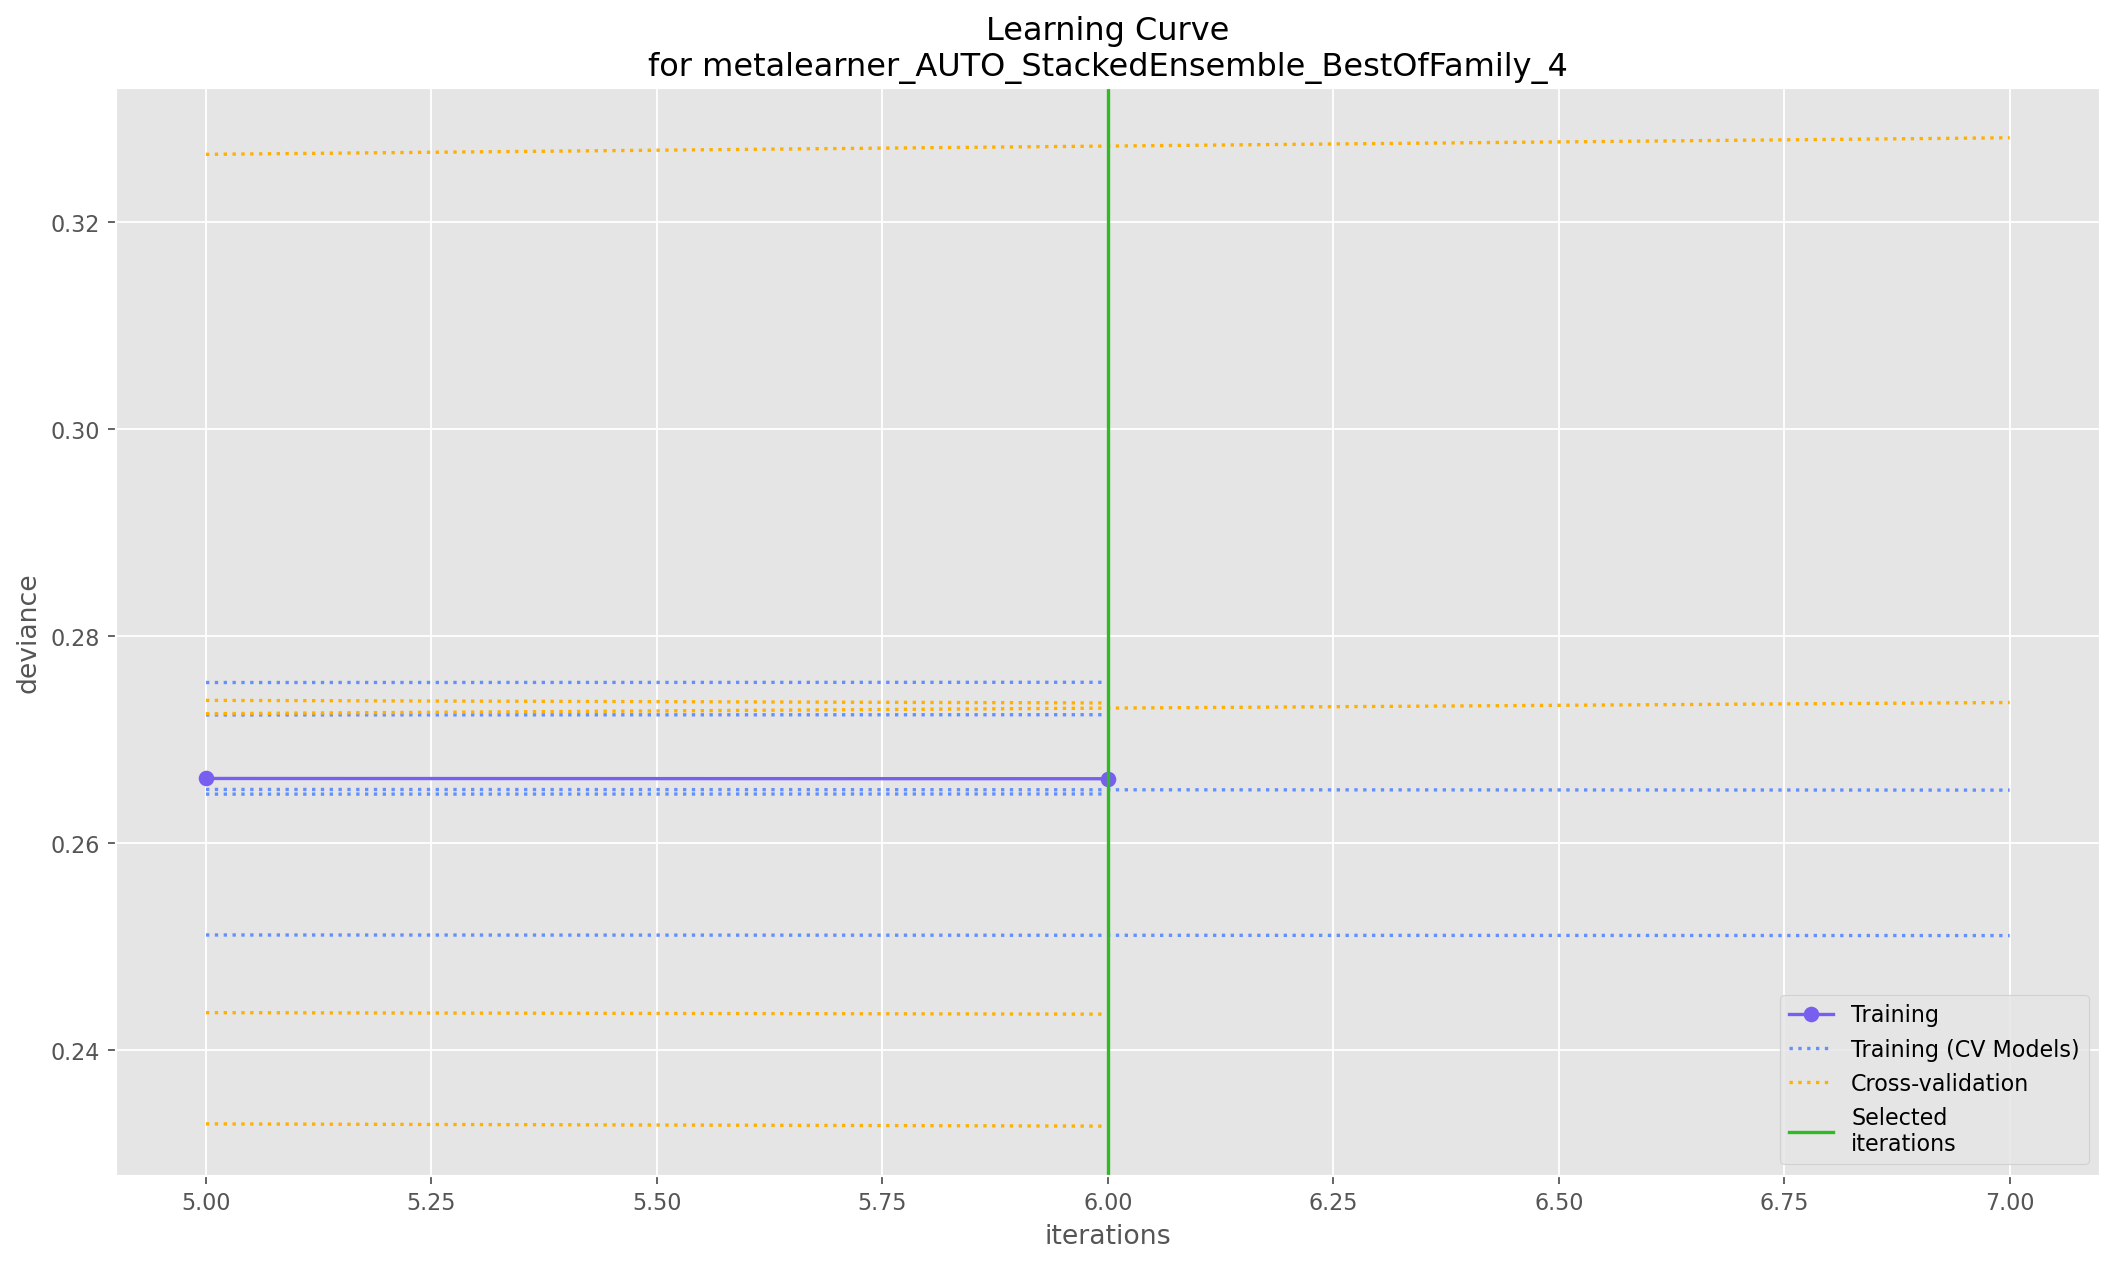

In [69]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [70]:
# Make prediction

preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [71]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,coherence_250.0-600.0,predict,NON_SOZ,SOZ
NON_SOZ,61,41,0,0.527295,0.190212,0.194513,0.181204,0.0426852,0.00136469,0.00188454,0.00015692,33.6446,1.29066,1.06754,1.02418,1.03551,1.09748,1.00632,1.2024,1.07743,0.388762,0.00372628,-0.000426247,0.0150321,0.792932,0.302037,0.737508,0.915868,0.766867,0.290521,0.738388,0.92736,0.83171,0.115445,0.791712,0.939734,0.945383,0.0411876,0.920198,0.978864,0.962987,0.0261345,0.95076,0.984936,0.961084,0.0496987,0.947875,0.984971,0.910489,0.044301,0.890241,0.962474,0.936287,0.0476332,0.902236,0.967007,0.899467,0.0326415,0.821885,0.936441,NON_SOZ,0.854017,0.145983
NON_SOZ,4,2,15,0.522892,0.288765,0.290193,0.262431,0.0564744,0.0016953,0.00254204,0.000214721,23.177,1.29184,1.06602,1.02394,1.03602,1.09603,1.00626,1.19878,1.07748,0.424,0.000707439,-0.00498672,0.0592447,0.6803,0.244885,0.630371,0.881626,0.762135,0.273154,0.760569,0.931511,0.881402,0.0940251,0.85708,0.960108,0.947005,0.0446041,0.914999,0.978202,0.959163,0.0286842,0.923924,0.982255,0.948641,0.0271543,0.896675,0.976166,0.916616,0.0206364,0.849197,0.963806,0.924675,0.0274313,0.85371,0.961169,0.906775,0.0237796,0.829388,0.940038,SOZ,0.736331,0.263669
NON_SOZ,58,38,80,0.556295,0.230107,0.266866,0.252279,0.0562708,0.00209894,0.00280625,0.000218766,29.981,1.28175,1.06643,1.0234,1.03509,1.09766,1.00623,1.20253,1.07755,0.394428,0.00612362,0.00373939,0.022959,0.958455,0.106217,0.922558,0.98158,0.971633,0.112984,0.953992,0.989006,0.989996,0.0217556,0.9757,0.995651,0.997628,0.00455479,0.992983,0.998909,0.997676,0.00379807,0.993624,0.999001,0.996479,0.00397379,0.989933,0.998266,0.962598,0.0141015,0.948792,0.982798,0.976427,0.0143832,0.95995,0.987514,0.966528,0.0130487,0.923064,0.97745,SOZ,0.559977,0.440023
NON_SOZ,75,11,71,0.614911,0.270569,0.340979,0.322704,0.0708394,0.00220846,0.0032064,0.000275031,36.7503,1.27678,1.06616,1.02329,1.0348,1.09708,1.0064,1.20171,1.07746,0.389213,0.00369222,-0.00572462,0.0259905,0.971121,0.088594,0.942822,0.985672,0.982456,0.0793925,0.96498,0.992719,0.99378,0.0152694,0.984235,0.997443,0.998218,0.00330717,0.994412,0.999223,0.998604,0.00232192,0.996428,0.99936,0.998303,0.00191977,0.994496,0.999181,0.994341,0.00354329,0.98573,0.997313,0.994595,0.0044201,0.983385,0.996947,0.968313,0.0123752,0.92604,0.978447,SOZ,0.602109,0.397891
NON_SOZ,89,7,65,0.674321,0.34015,0.461153,0.438884,0.0948376,0.00289858,0.00426716,0.000374427,39.5949,1.27475,1.06517,1.02307,1.03491,1.09671,1.00636,1.20223,1.07714,0.390298,0.00152352,-0.0110037,0.0269358,0.978772,0.0755761,0.955732,0.989625,0.988753,0.058656,0.976284,0.995803,0.996611,0.00969291,0.990866,0.998633,0.999109,0.0019704,0.997032,0.999589,0.999254,0.00112445,0.997988,0.999645,0.999252,0.00109846,0.997518,0.999637,0.998036,0.00159994,0.99385,0.999023,0.996223,0.00298049,0.986928,0.997876,0.968713,0.0127692,0.927198,0.978726,NON_SOZ,0.884004,0.115996
NON_SOZ,76,4,54,0.710659,0.393055,0.546909,0.519318,0.111019,0.00337491,0.00502206,0.000441948,38.7028,1.26285,1.06544,1.02325,1.03506,1.09659,

In [72]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['onset_channel', 'predict']].tail(50)
preds

,onset_channel,predict
57,SOZ,NON_SOZ
58,SOZ,NON_SOZ
59,SOZ,NON_SOZ
60,SOZ,SOZ
61,NON_SOZ,NON_SOZ
62,NON_SOZ,NON_SOZ
63,NON_SOZ,NON_SOZ
64,NON_SOZ,SOZ
65,NON_SOZ,NON_SOZ
66,NON_SOZ,NON_SOZ


In [73]:
# Save the results

df.to_csv('df.csv')
preds.to_csv('preds.csv')